In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_images(*args):
    pairs = []

    for a in args:
        if type(a) == str:
            pairs[-1][-1] = a
        else:
            pairs.append([a, ''])

    fig, axes = plt.subplots(ncols=len(pairs))
    
    for i, (image, title) in enumerate(pairs):
        axes[i].imshow(image, cmap='grey')
        axes[i].set_title(title)
        axes[i].axis('off')

### Unsharp masking

Let $\overline{f}(x, y)$ denote the blurred image

$g_{mask}(x, y) = f(x, y) - \overline{f}(x, y)$

$g(x, y) = f(x, y) + k * g_{mask}(x, y) \qquad k \geq 0$

One can think of $g_{mask}$ as storing edges, which are then added back to the original image.



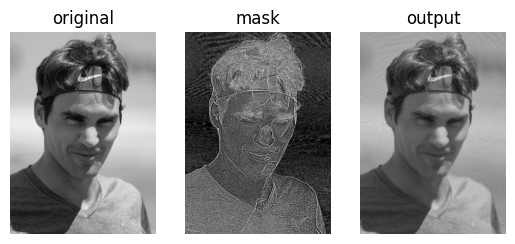

In [4]:
roger = cv2.imread('data/roger.jpg', 0)

k = 0.25
mask = roger - cv2.GaussianBlur(roger, (11, 11), 0)
unsharped = roger + k * mask

plot_images(roger, 'original', mask, 'mask', unsharped, 'output')

### Gradient of an image

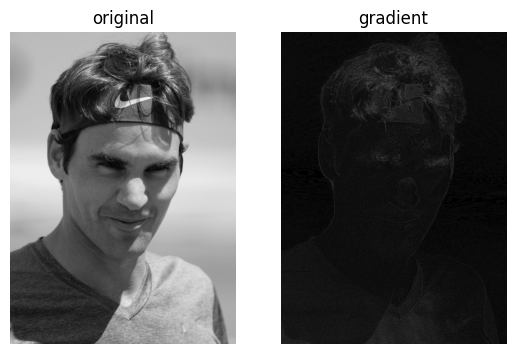

In [5]:
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
grad_squared = cv2.filter2D(roger, 0, kernel) # 0 for greyscale
grad = np.sqrt(grad_squared)

plot_images(roger, 'original', grad, 'gradient')

### Compare box filter and gaussian filter

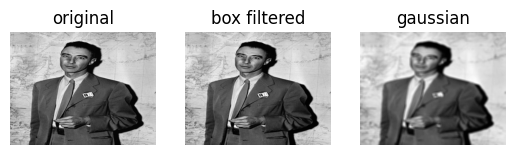

In [12]:
oppenheimer = cv2.imread('data/oppenheimer.jpg', 0)

M, N = oppenheimer.shape
oppenheimer = cv2.resize(oppenheimer, (M//3, N//3))

box_kernel = (1/9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

box_filtered = cv2.filter2D(oppenheimer, -1, box_kernel)
gaussian = cv2.GaussianBlur(oppenheimer, (21, 21), 51)

plot_images(oppenheimer, 'original', box_filtered, 'box filtered', gaussian, 'gaussian')

### Edge detection

Rober-cross gradient

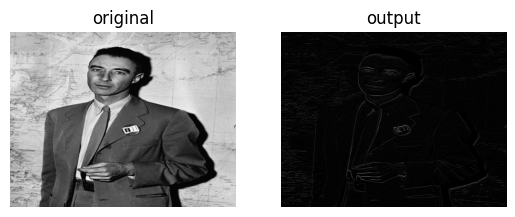

In [18]:
kernel_A = np.array([[0, 0, 0], [0, -1, 0], [0, 0, 1]]) # da z9 - z5 component
A = cv2.filter2D(oppenheimer, -1, kernel_A)

kernel_B = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
B = cv2.filter2D(oppenheimer, -1, kernel_B)

output = abs(A) + abs(B)

plot_images(oppenheimer, 'original', output, 'output')